# Capstone Project 1: Data Wrangling

## House Prices Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../raw_data/train.csv')

In [3]:
data_copy = data.copy()

### Data Overview

In [4]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The Housing dataset has 80 columns (not counting the Id column) and 1460 rows of data. There are 43 categorical features and 37 numerical (again, not counting the Id column).

Most columns have close to the full 1460 rows, some are missing about 100 rows or less, and a few columns have very few data (such as the "Alley" or "FireplaceQu" columns).

In [5]:
data_copy.head(30)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Looking at the first 30 rows of data we can see all the NaN values that will need to be handled later. First, lets find the columns with the missing values and count how many values are missing in each column.

### Missing values

In [6]:
missing_data = data_copy.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

The top four features (PoolQC, MiscFeature, Alley and Fence) in the list above are missing most of the values and the fifth feature (FireplaceQu) is missing almost half. However, it would make sense that not alot of properties would have a pool, alley access or a miscellaneous feature. For now, I will keep these columns and make an assumption that the missing values for these columns mean that those properties do not have those features, which means they can be replaced with zeros.

In [7]:
# Checking to see how many properties have 0 pools
data_copy['PoolArea'].isin([0]).sum()

1453

The Pool Quality ('PoolQC') column is missing 1453 values, but we can see from the PoolArea column that it's the same number of rows that have zeros or no pools.

MiscFeature, Alley and Fence columns don't correspond to other colums, so in this case I will make the same assumption that they don't exist on those properties.

In [8]:
# Checking to see how many properties have 0 fireplaces.
data_copy['Fireplaces'].isin([0]).sum()

690

690 properties have no fireplaces. This matches exactly with the number of missing values in the Fireplace Quality ('FireplaceQu') column.

### Categorical and Numerical Columns

First, we can separate categorical and numerical features into two sets.

In [9]:
data_categorical = data_copy.select_dtypes(include = ['object']).copy()
data_numerical = data_copy.select_dtypes(exclude = ['object']).copy()

In [10]:
# Categorical Columns
data_categorical.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [11]:
# Numerical Columns
data_numerical.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### Data Cleaning of Numerical Columns

In [12]:
missing_data_numerical = data_numerical.isnull().sum()
missing_data_numerical = missing_data_numerical[missing_data_numerical > 0]
missing_data_numerical.sort_values(ascending = False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

We can fill the missing values for the LotFrontage and GarageYrBlt columns with the median.

In [13]:
data_numerical['LotFrontage'].median()

69.0

In [14]:
data_numerical['LotFrontage'] = data_numerical['LotFrontage'].fillna(69)

In [15]:
data_numerical['GarageYrBlt'].median()

1980.0

In [16]:
data_numerical['GarageYrBlt'] = data_numerical['GarageYrBlt'].fillna(1980)

In [17]:
data_numerical['MasVnrArea'].head(15)

0     196.0
1       0.0
2     162.0
3       0.0
4     350.0
5       0.0
6     186.0
7     240.0
8       0.0
9       0.0
10      0.0
11    286.0
12      0.0
13    306.0
14    212.0
Name: MasVnrArea, dtype: float64

Looks like alot of the rows in the Masonry veneer area column are zeros. Since the MasVnrType column missing values were filled with 'None', I will fill the missing values for the MasVnrArea with zeros.

In [18]:
data_numerical['MasVnrArea'] = data_numerical['MasVnrArea'].fillna(0)

In [19]:
# Checking if all the numerical missing values were filled
data_numerical['MasVnrArea'].isnull().sum()

0

Columns with numerical features are now clean, they have no missing values. Next, we will take care of the categorical features.

### Data Cleaning of Categorical Columns

In [20]:
missing_data_categorical = data_categorical.isnull().sum()
missing_data_categorical = missing_data_categorical[missing_data_categorical > 0]
missing_data_categorical.sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
Electrical         1
dtype: int64

The top 5 columns with the majority missing values may need to be dropped later (depending on how significant they are for the price), but for now they will be filled with "None"

In [21]:
majority_none_garage_bsmt_columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
                                     'GarageCond','GarageQual','GarageFinish','GarageType',
                                     'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond',
                                     'BsmtQual']
data_categorical[majority_none_garage_bsmt_columns] = data_categorical[majority_none_garage_bsmt_columns].fillna('None')

In [22]:
# Checking if all the missing values in the selected columns are filled
data_categorical[majority_none_garage_bsmt_columns].isnull().sum()

PoolQC          0
MiscFeature     0
Alley           0
Fence           0
FireplaceQu     0
GarageCond      0
GarageQual      0
GarageFinish    0
GarageType      0
BsmtFinType2    0
BsmtExposure    0
BsmtFinType1    0
BsmtCond        0
BsmtQual        0
dtype: int64

Electrical and MasVnrType colums are only missing 1 and 8 values respectively, which can be filled with mode.

In [23]:
data_categorical['Electrical'].mode()

0    SBrkr
dtype: object

In [24]:
data_categorical['MasVnrType'].mode()

0    None
dtype: object

In [25]:
data_categorical['Electrical'] = data_categorical['Electrical'].fillna('SBrkr')

In [26]:
data_categorical['MasVnrType'] = data_categorical['MasVnrType'].fillna('None')

In [27]:
data_categorical[['Electrical', 'MasVnrType']].isnull().sum()

Electrical    0
MasVnrType    0
dtype: int64

### Handling Nominal Categorical Features

Next, we can create dummy variables for some of the nominal categorical features.

In [28]:
data_categorical_dummies = ['MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig',
                            'LandSlope','Neighborhood','Condition1','BldgType', 'GarageType',
                            'Heating','Electrical','MiscFeature','SaleType','SaleCondition']
data_categorical = pd.concat([data_categorical, 
                              pd.get_dummies(data_categorical[data_categorical_dummies])], axis=1)

In [29]:
data_categorical.head(15)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,1,0,0,0,0,1,0
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,1,0,0,0,0,1,0
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,1,0,0,0,0,1,0
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,0,1,1,0,0,0,0,0
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,1,0,0,0,0,1,0
5,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0,0,0,1,0,0,0,0,1,0
6,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,0,0,0,1,0,0,0,0,1,0
7,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,0,0,0,1,0,0,0,0,1,0
8,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,0,0,0,1,1,0,0,0,0,0
9,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,0,0,0,1,0,0,0,0,1,0


In [30]:
# Dropping the original nominal categorical features columns
data_categorical = data_categorical.drop(data_categorical[data_categorical_dummies], axis=1)
data_categorical.head()

,Street,Condition2,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,Pave,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,0,0,0,1,0,0,0,0,1,0
1,Pave,Norm,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,...,0,0,0,1,0,0,0,0,1,0
2,Pave,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,0,0,0,1,0,0,0,0,1,0
3,Pave,Norm,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,...,0,0,0,1,1,0,0,0,0,0
4,Pave,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,0,0,0,1,0,0,0,0,1,0


### Handling Binary Categorical Features

In [31]:
data_categorical[['Street','CentralAir']].head()

,Street,CentralAir
0,Pave,Y
1,Pave,Y
2,Pave,Y
3,Pave,Y
4,Pave,Y


In [32]:
data_categorical['Street'] = data_categorical['Street'].replace({'Pave':1, 'Grvl':0})
data_categorical['CentralAir'] = data_categorical['CentralAir'].replace({'Y':1, 'N':0})

data_categorical[['Street','CentralAir']].head()

,Street,CentralAir
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [33]:
data_categorical.head()

,Street,Condition2,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,0,0,0,1,0,0,0,0,1,0
1,1,Norm,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,...,0,0,0,1,0,0,0,0,1,0
2,1,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,0,0,0,1,0,0,0,0,1,0
3,1,Norm,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,...,0,0,0,1,1,0,0,0,0,0
4,1,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,0,0,0,1,0,0,0,0,1,0


### Saving Clean Data

Now that we have a clean data, we can concatenate the categorical and numerical columns.

In [34]:
data_clean = pd.concat([data_categorical, data_numerical], axis=1)
data_clean.head(20)

,Street,Condition2,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,0,61,0,0,0,0,0,2,2008,208500
1,1,Norm,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,...,298,0,0,0,0,0,0,5,2007,181500
2,1,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,0,42,0,0,0,0,0,9,2008,223500
3,1,Norm,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,...,0,35,272,0,0,0,0,2,2006,140000
4,1,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,...,192,84,0,0,0,0,0,12,2008,250000
5,1,Norm,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,...,40,30,0,320,0,0,700,10,2009,143000
6,1,Norm,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,...,255,57,0,0,0,0,0,8,2007,307000
7,1,Norm,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,...,235,204,228,0,0,0,350,11,2009,200000
8,1,Norm,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,...,90,0,205,0,0,0,0,4,2008,129900
9,1,Artery,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,...,0,4,0,0,0,0,0,1,2008,118000


Finally, the clean data can be saved as a new csv file that can be used for further analysis.

In [35]:
data_clean.to_csv(r'../data/clean_housing_data.csv', index=False)

<AxesSubplot:>

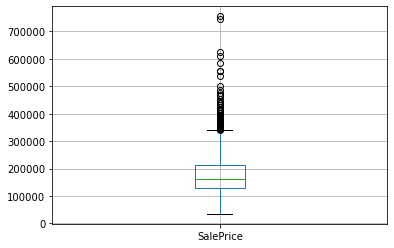

In [36]:
data_copy.boxplot('SalePrice')